# Orbital-scale variability over the last 1.5 Ma

## Authors

Julien Emile-Geay [![ORCID](https://img.shields.io/badge/ORCID-0000--0001--5920--4751-A6CE39?logo=orcid)](https://orcid.org/0000-0001-5920-4751) and Deborah Khider [![ORCID](https://img.shields.io/badge/ORCID-0000--0001--7501--8430-A6CE39?logo=orcid)](https://orcid.org/0000-0001-7501-8430)

## Preamble

 [Hodell et al (2023)](https://doi.org/10.5194/cp-19-607-2023) report a continuous millennially resolved record of stable isotopes of planktic and benthic foraminifera at IODP Site U1385 (the “Shackleton Site”) from the southwestern Iberian margin for the last 1.5 million years, which includes the Middle Pleistocene Transition (MPT). Here we use this high-resolution record in the context of `Pyleoclim`, which permits coherence analysis and advanced visualizations. 

### Goals

Technical skills involved:

- using the [`pangaeapy` package](https://pypi.org/project/pangaeapy/) to access datasets stored on PANGAEA
- applying and interpreting [spectral analysis](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#psd-pyleoclim-psd) in Pyleoclim
- applying and interpreting [wavelet analysis](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#scalogram-pyleoclim-scalogram) in Pyleoclim
- applying and interpreting [Wavelet Transform Coherency](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#coherence-pyleoclim-coherence) analysis

<div style="
    padding: 10px; 
    background-color: #e7f3fe; 
    border-left: 6px solid #2196F3; 
    margin-bottom: 15px;">
  <strong>Note:</strong> This notebook was created with the help of an artificial intelligent (AI) assistant for paleoclimatology (PaleoPAL) that it currently under active development. Code and conclusions were reviewed by the Notebook authors. Prompts to the AI are written in the markdown cells (preceded by @agent) and kept for transparency. Correction to the code is marked. The additional lines of code generated by PaleoPAL but not needed in the context of this notebook are commented out. The GPT5/GPT5.2 models were used by PaleoPAL for generation in this notebook.
</div>

### Data

This notebook makes use of "Shackleton site" oxygen isotopes records. The main data repository is on [PANGAEA](https://doi.pangaea.de/10.1594/PANGAEA.951401) and contains 9 sub-datasets, some of which we will be analyzing here.

### Reading time
10min

### Keywords
Pyleoclim, Shackleton Site, Spectral Analysis, Wavelet Analysis, Coherence Analysis

Let's import the needed packages:

In [1]:
%load_ext autoreload
%autoreload 2

import pyleoclim as pyleo
from pangaeapy.pandataset import PanDataSet

## Exploratory analysis
### Benthic record

Let's obtain the record from PANGAEA:

In [2]:
# load the dataset
dsb = PanDataSet('10.1594/PANGAEA.951382')
print(dsb.title)
display(dsb.data.head())

Oxgyen and carbon isotope data for benthic foraminifera at IODP Site 339-U1385


,Event,Latitude,Longitude,Sample label,Depth sed,Depth comp,Depth comp r,Depth corr cr,Age,Age_2,...,Age_4,Species,Cibicidoides spp. δ18O,Cibicidoides spp. δ13C,G. affinis δ18O,G. affinis δ13C,Uvigerina spp. δ18O,Uvigerina spp. δ13C,Foram benth δ18O,Elevation
0,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,1-2",0.02,0.02,0.02,0.02,0.13,0.12,...,0.14,Cibicidoides wuellerstorfi,2.57,0.98,NaN,NaN,2.90,-0.42,3.21,-2584.0
1,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,20-21",0.21,0.21,0.21,0.21,1.37,1.22,...,1.46,Cibicidoides wuellerstorfi,2.77,1.20,NaN,NaN,NaN,NaN,3.41,-2584.0
2,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,21-22",0.22,0.22,0.22,0.22,1.44,1.28,...,1.53,Uvigerina spp.,NaN,NaN,NaN,NaN,3.37,0.04,3.37,-2584.0
3,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,40-41",0.41,0.41,0.41,0.41,2.66,2.39,...,2.85,Cibicidoides wuellerstorfi,2.77,1.16,NaN,NaN,NaN,NaN,3.41,-2584.0
4,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,41-42",0.42,0.42,0.42,0.42,2.72,2.44,...,2.92,Cibicidoides wuellerstorfi,2.59,0.95,NaN,NaN,NaN,NaN,3.23,-2584.0


Let's have a look at the information stored in each column:

In [3]:
dsb.data.columns

Index(['Event', 'Latitude', 'Longitude', 'Sample label', 'Depth sed',
       'Depth comp', 'Depth comp r', 'Depth corr cr', 'Age', 'Age_2', 'Age_3',
       'Age_4', 'Species', 'Cibicidoides spp. δ18O', 'Cibicidoides spp. δ13C',
       'G. affinis δ18O', 'G. affinis δ13C', 'Uvigerina spp. δ18O',
       'Uvigerina spp. δ13C', 'Foram benth δ18O', 'Elevation'],
      dtype='object')

In [4]:
dsb.data['Foram benth δ18O']

0       3.21
1       3.41
2       3.37
3       3.41
4       3.23
        ... 
8246    3.51
8247    3.48
8248    3.48
8249    3.33
8250    3.26
Name: Foram benth δ18O, Length: 8251, dtype: float64

Let's create a [`GeoSeries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#geoseries-pyleoclim-geoseries). This object holds additional metadata compared to its `Series` parent, allowing for better visualizations. Since `GeoSeries` is a subclass of `Series`, all the methods available in `Series` are applicable to `GeoSeries`.

In [4]:
tsb = pyleo.GeoSeries(time=dsb.data['Age'], value=dsb.data['Foram benth δ18O'],
                      lat = dsb.data['Latitude'].iloc[0], lon = dsb.data['Longitude'].iloc[0],
                      elevation = dsb.data['Elevation'].iloc[0], archiveType = 'MarineSediment', 
                      time_name='Age', time_unit='ka BP', label = 'Benthic foram composite',
                      value_name='$\delta^{18}$O', value_unit=u'‰')

Time axis values sorted in ascending order


One of these methods is the dashboard which plots the time series, maps the location of the archive and performs spectral analysis. We will be using the dashboard method here as an example. For speed, the timeseries was interpolated to run spectral analysis with the MTM method.

<div style="
    padding: 10px; 
    background-color: #fff3cd; 
    border-left: 6px solid #ffcc00; 
    margin: 10px 0;">
    <strong>Warning:</strong> On a Mac, this cell may take up to 30 min to run if you choose the default method for spectral analysis
</div>

Time axis values sorted in ascending order


Performing spectral analysis on individual series: 100%|██████████| 200/200 [00:04<00:00, 44.60it/s] 


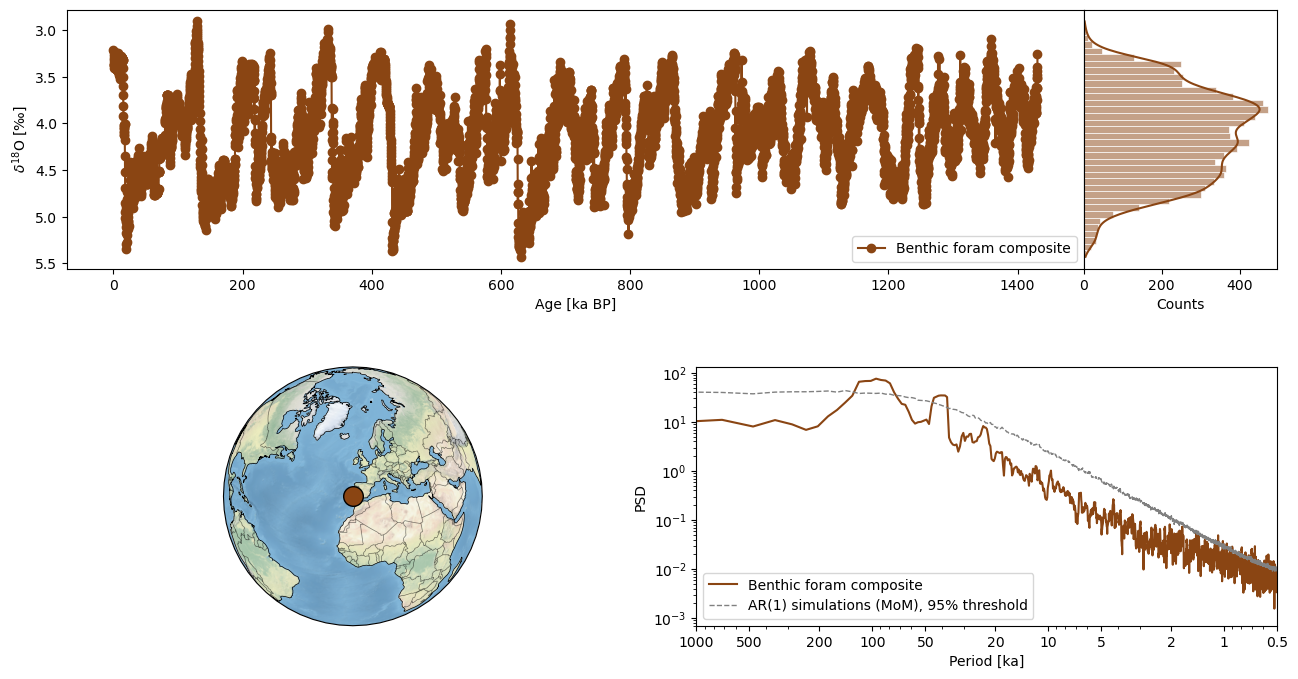

In [ ]:
fig,ax = tsb.interp().dashboard(spectral_kwargs={'method':'mtm'}, plt_kwargs={'invert_yaxis':True})

<div style="
    padding: 10px; 
    background-color: #e7f3fe; 
    border-left: 6px solid #2196F3; 
    margin-bottom: 15px;">
  <strong>Note:</strong> The chronology used in this paper is a hybrid model constructed using a combination of age–depth points from MD01-2444 and U1385. The age model is accurate to a precession cycle (∼ 23 kyr) but cannot provide exact absolute or relative dates for millennial events. This shortcoming limits the reliability of suborbital spectral peaks and estimation of recurrence times of millennial events. Nonetheless, the relative phasing of signals recording different components of the ocean–atmosphere system can be determined stratigraphically without the need for a timescale that is accurate at suborbital resolution. This is particularly important for inferring the phase relationship between planktic and benthic δ18O, which reflects the interhemispheric leads and lags of the two polar regions.
</div>

We see obliquity and eccentricity periods throughout the record, as expected. 

You can also plot the timeseries with its appropriate geological era as such:

Using rdflib to load GTS information from ICS


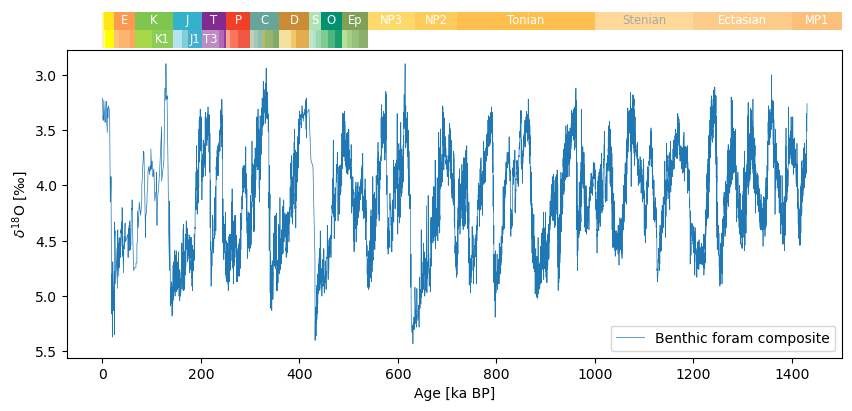

In [10]:
fig, ax = tsb.plot(figsize=(10, 4),linewidth=0.5)
ax.invert_yaxis() # d18O is traditionally inverted
fig, ax = pyleo.add_GTS(fig, ax, ranks=['Period', 'Epoch'], location='above')

### Planktonic record

The planktonic record is also available [on PANGAEA](https://doi.pangaea.de/10.1594/PANGAEA.951386).

In [5]:
dsp = PanDataSet('10.1594/PANGAEA.951386')
print(dsp.title)
display(dsp.data.head())

Oxgyen and carbon isotope data for the planktonic foraminifera Globigerina bulloides at IODP Site 339-U1385


,Event,Latitude,Longitude,Sample label,Depth sed,Depth comp,Depth comp r,Depth corr cr,Age,Age_2,Age_3,Age_4,G. bulloides δ18O,G. bulloides δ13C,Elevation
0,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,0-1",0.01,0.01,0.01,0.01,0.07,0.06,0.06,0.07,0.45,-0.70,-2584.0
1,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,20-21",0.21,0.21,0.21,0.21,1.37,1.22,1.22,1.46,0.30,-0.78,-2584.0
2,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,40-41",0.41,0.41,0.41,0.41,2.66,2.39,2.39,2.85,0.16,-0.88,-2584.0
3,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,60-61",0.61,0.61,0.61,0.61,3.86,3.55,3.55,4.24,0.34,-0.70,-2584.0
4,339-U1385D,37.5713,-10.1259,"339-U1385D-1H-1,80-81",0.81,0.81,0.81,0.81,5.06,4.71,4.71,5.63,0.24,-1.17,-2584.0


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Using rdflib to load GTS information from ICS


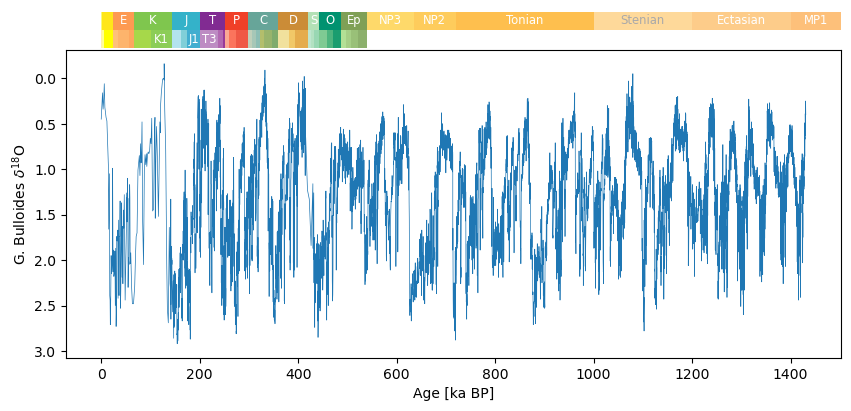

In [6]:
tsp = pyleo.GeoSeries(time=dsp.data['Age'], value=dsp.data['G. bulloides δ18O'],
                      lat = dsp.data['Latitude'].iloc[0], lon = dsp.data['Longitude'].iloc[0],
                      elevation = dsb.data['Elevation'].iloc[0], archiveType = 'MarineSediment', 
                      time_name='Age', time_unit='ka BP', label = 'Planktonic record (G. bulloides)',
                      value_name='$\delta^{18}$O', value_unit=u'‰')
fig, ax = tsp.plot(figsize=(10, 4),linewidth=0.5,invert_yaxis=True, legend = False, ylabel = "G. Bulloides $\delta^{18}$O")
fig, ax = pyleo.add_GTS(fig, ax, ranks=['Period', 'Epoch'], location='above')

Let's plot the planktonic and benthic data together. To do so, you can create a [`MultipleGeoSeries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multiplegeoseries-pyleoclim-multiplegeoseries) and use the [`stackplot` function](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.stackplot):

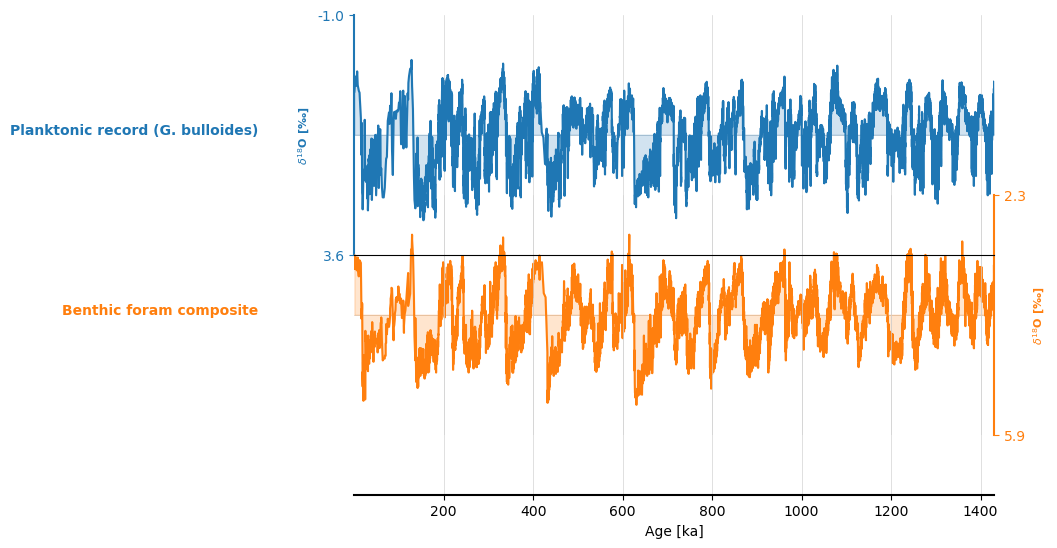

In [16]:
ms = tsp & tsb
fig, ax = ms.stackplot()
ax[0].invert_yaxis()
ax[1].invert_yaxis()

DescribeResult(nobs=np.int64(8100), minmax=(np.float64(0.0), np.float64(3.660000000000025)), mean=np.float64(0.1766456790123457), variance=np.float64(0.035434666390760095), skewness=np.float64(8.636534814144614), kurtosis=np.float64(110.7583996695836))

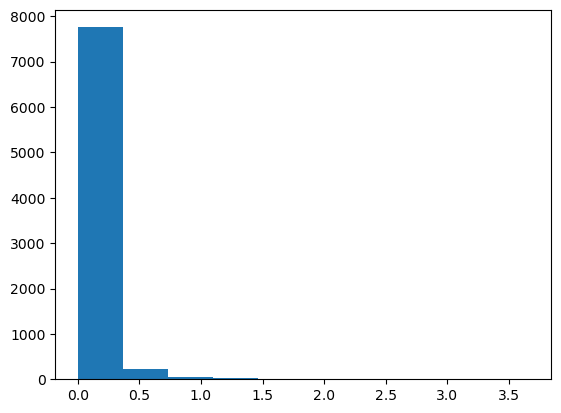

In [17]:
res, stats , sign =  pyleo.utils.tsbase.resolution(tsp.time)
import matplotlib.pyplot as plt
plt.hist(res)
stats

The data are unenvely spaced, so we will either need to intepret on a common evenly spaced time axis or use methods appropriate for unevenly spaced dataset (such as the weighted wavelet Z transform) for coherence analysis. 

## Coherence Analysis

Let's have a look at the coherence between the planktonic and benthic data:

In [18]:
coh = tsp.wavelet_coherence(tsb,method='wwz')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [19]:
coh_sig = coh.signif_test(number=100)

Performing wavelet coherence on surrogate pairs:   0%|          | 0/100 [00:00<?, ?it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine 

(<Figure size 900x1200 with 6 Axes>,
 {'ts1': <Axes: ylabel='$\\delta^{18}$O [‰]'>,
  'ts2': <Axes: xlabel='Age [ka BP]', ylabel='$\\delta^{18}$O [‰]'>,
  'wtc': <Axes: ylabel='Scale [kyrs]'>,
  'xwt': <Axes: xlabel='Age [ka BP]', ylabel='Scale [kyrs]'>})

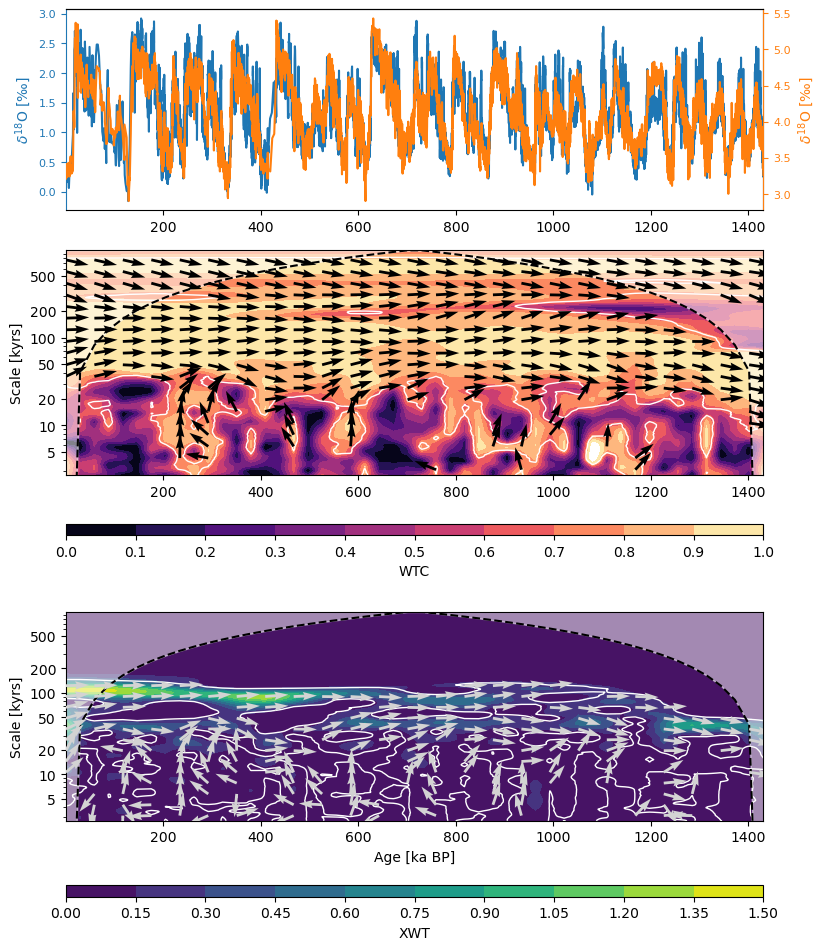

In [20]:
coh_sig.dashboard()

XWT (cross-wavelet transform) informs about areas where there is high common power between the two series. The analysis reveals high common power in the eccentricity band (~100kyr) and to some extent, the obliquity band (~40kyr), which phase angles indicating a out of phase behavior between the two. 

WTC (wavelet transform coherence) shows areas of common behavior between the two time series even if there is low power. The analysis shows common behavior accross the 23-200 kyr band through the entire record. 

## Comparison to insolation

[climlab](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose does many great things. One of them is to compute insolation curves. 

As a proof of concept, we will create an insolation curve for JJA at the latitude of the site (37°N).

In [7]:
from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
import numpy as np

kyears = np.linspace(-1500, 0, 1001 ) # specify time interval and units
orb = OrbitalTable.interp(kyear=kyears) # subset of orbital parameters for specified time
days = np.linspace(0, const.days_per_year, 365)

Qsb = daily_insolation(dsb.data['Latitude'].iloc[0], days, orb) # generate insolation  at IODP339-U1385 latitude
Qsb_jja = np.mean(Qsb[:,151:243], axis=1)  # Julian days 152-243 are JJA

Let's create a Pyleoclim Series from the insolation curve.

In [8]:
ts_ins = pyleo.Series(value = Qsb_jja, time = -kyears,
                      value_name = 'Insolation', time_name = 'Age',
                       value_unit = '$W/m^{2}$', time_unit='ky BP', label='Insolation', verbose=False )

Let's plot the planktonic record with insolation:

@agent code I have two Pyleoclim Series, tsp, which contains information about planktonic d18O and ts_ins, which is an insolation curve. I need to plot them on the same plot using two y-axis, with insolation on the axis on the right.

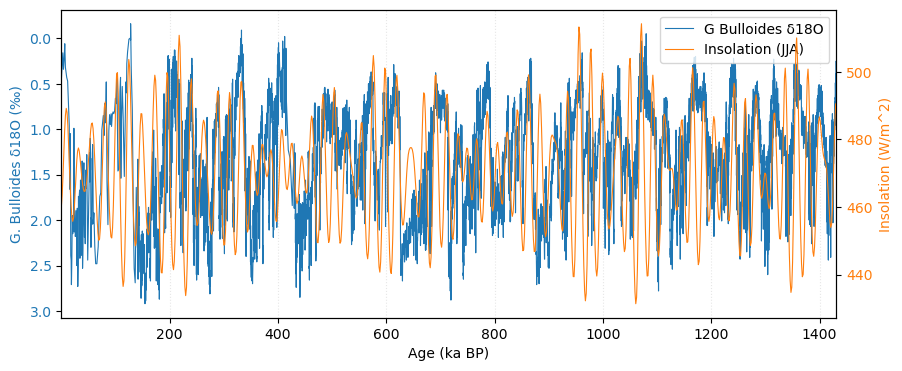

In [9]:
# This code plots the planktonic d18O Series (tsp) and the insolation Series (ts_ins) on the same figure with two y-axes. The left y-axis shows d18O (inverted, as customary), and the right y-axis shows insolation. It converts both Pyleoclim Series to pandas Series for straightforward plotting with matplotlib, aligns x-limits to their common time coverage, and combines legends from both axes.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

# Plot planktonic \u03b418O (tsp) and insolation (ts_ins) on dual y-axes, with insolation on the right
import matplotlib.pyplot as plt
import pandas as pd

# Convert Pyleoclim Series to pandas Series (index=time, values=value)
#tsp_pd = tsp.to_pandas(paleo_style=False)
#ts_ins_pd = ts_ins.to_pandas(paleo_style=False)

# Extract numpy arrays for plotting
#x1 = tsp_pd.index.values
#y1 = tsp_pd.values

#x2 = ts_ins_pd.index.values
#y2 = ts_ins_pd.values

#DK: Going through Pandas is technically correct but right now Matplotlib cannot plot large datetime values

x1 = tsp.time
y1 = tsp.value

x2 = ts_ins.time
y2 = ts_ins.value

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(10, 4))

# Left y-axis: planktonic \u03b418O
line1, = ax.plot(x1, y1, color="tab:blue", linewidth=0.8, label="G Bulloides \u03b418O")
ax.set_ylabel("G. Bulloides \u03b418O (\u2030)", color="tab:blue")
ax.tick_params(axis="y", labelcolor="tab:blue")
ax.invert_yaxis()

# Right y-axis: insolation
ax2 = ax.twinx()
line2, = ax2.plot(x2, y2, color="tab:orange", linewidth=0.8, label="Insolation (JJA)")
ax2.set_ylabel("Insolation (W/m^2)", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# X-axis label and common limits
ax.set_xlabel("Age (ka BP)")
try:
    xmin = max(float(x1.min()), float(x2.min()))
    xmax = min(float(x1.max()), float(x2.max()))
    if xmin < xmax:
        ax.set_xlim(xmin, xmax)
except Exception:
    # If limits cannot be computed, fall back to matplotlib defaults
    pass

# Combined legend
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc="upper right")

# Cosmetic tweaks
ax.grid(True, axis="x", linestyle=":", alpha=0.3)
#plt.tight_layout()
plt.show()

Let's now run coherence analysis between the planktonic $\delta^{18}O$ record and JJA insolation at 37°N.

@agent code Run wavelet coherence between tsp and ts_ins

inconsistent `tau`, recalculating...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Performing wavelet coherence on surrogate pairs:   0%|          | 0/50 [00:00<?, ?it/s]

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:   2%|▏         | 1/50 [00:15<13:00, 15.93s/it]

inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  28%|██▊       | 14/50 [00:26<00:54,  1.51s/it]

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  34%|███▍      | 17/50 [00:26<00:33,  1.01s/it]

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  44%|████▍     | 22/50 [00:26<00:14,  1.87it/s]

inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  50%|█████     | 25/50 [00:37<00:34,  1.40s/it]

inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  52%|█████▏    | 26/50 [00:37<00:29,  1.25s/it]

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  56%|█████▌    | 28/50 [00:37<00:21,  1.05it/s]

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  66%|██████▌   | 33/50 [00:37<00:08,  1.90it/s]

inconsistent `tau`, recalculating...
inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  72%|███████▏  | 36/50 [00:38<00:05,  2.52it/s]

inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  76%|███████▌  | 38/50 [00:47<00:16,  1.36s/it]

inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs:  78%|███████▊  | 39/50 [00:47<00:13,  1.20s/it]

inconsistent `tau`, recalculating...


Performing wavelet coherence on surrogate pairs: 100%|██████████| 50/50 [00:53<00:00,  1.07s/it]


{'coherence': <pyleoclim.core.coherences.Coherence at 0x33e76aa80>,
 'coherence_signif': <pyleoclim.core.coherences.Coherence at 0x33e76ad50>,
 'phase_precession': Results(mean_angle=np.float64(-2.261491095182794), kappa=np.float64(1.9555923512328888), sigma=np.float64(0.8587823769100564), kappa_hi=np.float64(1.0160447206388548), sigma_lo=np.float64(1.2577156087852164)),
 'phase_obliquity': Results(mean_angle=np.float64(-2.4433980765022905), kappa=np.float64(3.4745152385146185), sigma=np.float64(0.5883724826422292), kappa_hi=np.float64(1.1703081848485475), sigma_lo=np.float64(1.1666165093211687)),
 'phase_eccentricity': Results(mean_angle=np.float64(0.08117933783286828), kappa=np.float64(3.7666732606233713), sigma=np.float64(0.5591804313165193), kappa_hi=np.float64(15.791020796914115), sigma_lo=np.float64(0.25584532899281465)),
 'overlap_timespan': (0.07, 1430.9)}

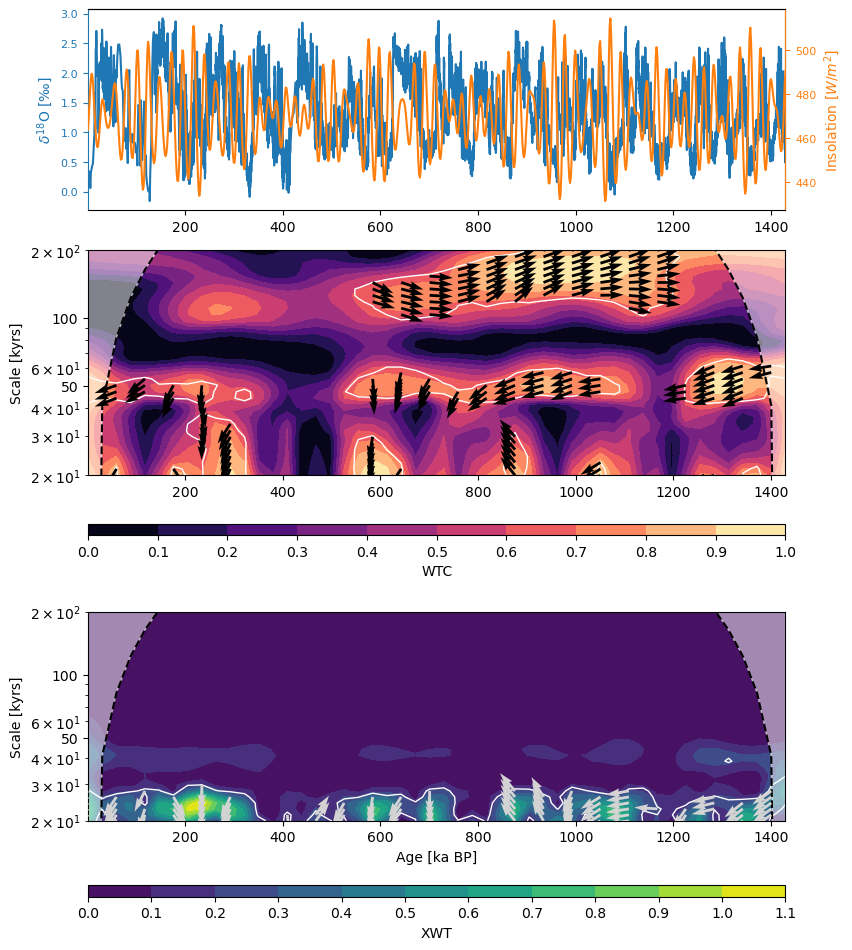

In [10]:
# Computes WWZ-based wavelet coherence between existing Series `tsp` (planktonic d18O) and `ts_ins` (JJA insolation), restricts both to their common time overlap, runs a Monte Carlo significance test, produces a coherence dashboard plot, and returns coherence objects plus phase statistics for precession/obliquity/eccentricity bands.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

import numpy as np
import pyleoclim as pyleo

# Run wavelet coherence between planktonic \u03b418O (tsp) and JJA insolation (ts_ins)
# Prefer WWZ since tsp is unevenly spaced; ts_ins is evenly spaced but WTC can handle both.

# Ensure time axes are ascending (some paleo series may be descending)
try:
    tsp_sorted = tsp.sort(verbose=False, ascending=True, keep_log=False)
except Exception:
    tsp_sorted = tsp

try:
    ts_ins_sorted = ts_ins.sort(verbose=False, ascending=True, keep_log=False)
except Exception:
    ts_ins_sorted = ts_ins

# Restrict to common overlap to avoid edge effects and unnecessary computation
try:
    tmin = max(np.nanmin(tsp_sorted.time), np.nanmin(ts_ins_sorted.time))
    tmax = min(np.nanmax(tsp_sorted.time), np.nanmax(ts_ins_sorted.time))
    tsp_olap = tsp_sorted.slice((tmin, tmax))
    ts_ins_olap = ts_ins_sorted.slice((tmin, tmax))
except Exception:
    tsp_olap = tsp_sorted
    ts_ins_olap = ts_ins_sorted

# Coherence settings: orbital bands of interest ~20-200 kyr => frequencies 1/200 to 1/20 1/kyr
freq_kwargs = {"fmin": 1/200, "fmax": 1/20, "nf": 36}

# Compute wavelet coherence
coh_ins = tsp_olap.wavelet_coherence(
    ts_ins_olap,
    method="wwz",
    freq="log",
    freq_kwargs=freq_kwargs,
    verbose=True
)

# Significance testing (increase number for research-grade, e.g., 200+)
coh_ins_sig = coh_ins.signif_test(number=50)

# Dashboard plot (XWT + WTC + phase arrows + global coherence)
fig = coh_ins_sig.dashboard()

# Optional: phase statistics for specific scale bands (in kyr)
# Example: precession (19-23 kyr), obliquity (35-45 kyr), eccentricity (80-120 kyr)
phase_precession = coh_ins.phase_stats(scales=[19, 23])
phase_obliquity = coh_ins.phase_stats(scales=[35, 45])
phase_eccentricity = coh_ins.phase_stats(scales=[80, 120])

# Collect key outputs in a dict for downstream use
results = {
    "coherence": coh_ins,
    "coherence_signif": coh_ins_sig,
    "phase_precession": phase_precession,
    "phase_obliquity": phase_obliquity,
    "phase_eccentricity": phase_eccentricity,
    "overlap_timespan": (float(np.nanmin(tsp_olap.time)), float(np.nanmax(tsp_olap.time))) if hasattr(tsp_olap, "time") else None,
}

results

The XWT analysis shows strong coherence between the two timeseries in the precession band while the WTC shows coherence, albeit weaker, in the obliquity and eccentricity bands as well. The arrows, indicating the phase relationship, are not consistent throughout, most likely due to large age model uncertainty in the marine sediment record. 